In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Analytical vs. numerical approach
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#length = 11
#X = np.arange(1, 12).reshape((11,1))
#y = X + 10 * np.random.rand(11).reshape((11, 1))
#y = y + 0.3 * y**2
#y = y - np.min(y)
#y = np.array([6, 12, 7, 12, 11, 10, 16, 22, 19, 27, 23]).reshape(11, 1)

#np.save('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle', y,\
#        allow_pickle=True)
#np.save('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle', X,\
#        allow_pickle=True)
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
model = LinearRegression()
model.fit(X, y)
y_hat = model.coef_ * X + model.intercept_
# plt.plot(X, y, 'ro')
# plt.show()

In [3]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
model = LinearRegression()
model.fit(X, y)
y_hat = model.coef_ * X + model.intercept_

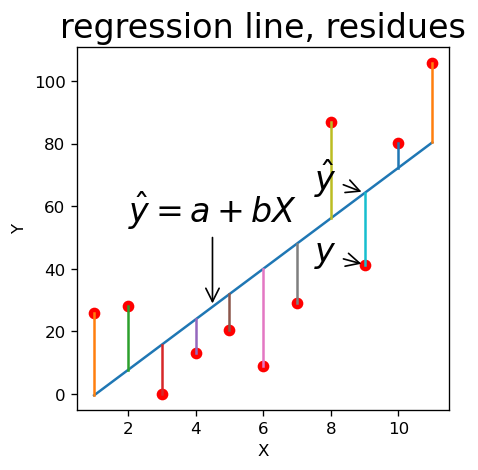

In [4]:
f = plt.figure(figsize=(4, 4), dpi=120)
plt.title(label='regression line, residues', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X, y, 'ro', X, y_hat)
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])
for i in range(len(y)):
    plt.plot((X[i, 0], X[i, 0]), (y[i], y_hat[i]))

axes.set_xlabel('X') 
axes.set_ylabel('Y')

axes.annotate('$y$', xy=(X[-3, 0], y[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y}$', xy=(X[-3, 0], y_hat[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y_hat[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y} = a + bX$', xy=(X[3, 0] + 0.5, model.coef_ * (X[3, 0] + 0.5) + model.intercept_),
              xycoords='data', xytext=(X[3, 0] + 0.5, 55), textcoords='data',
              horizontalalignment = 'center',
              size = 20, arrowprops=dict(arrowstyle="->"))
plt.show()

#plt.close('all')

## Derivation of parameters analytically

We need the first derivative of the error-term with respect to the parameters. By setting the resulting equation equal to zero we assure that we get the parameter estimate at the minimum.

here is a example for the formula $f(x) = (x-1)^2$:

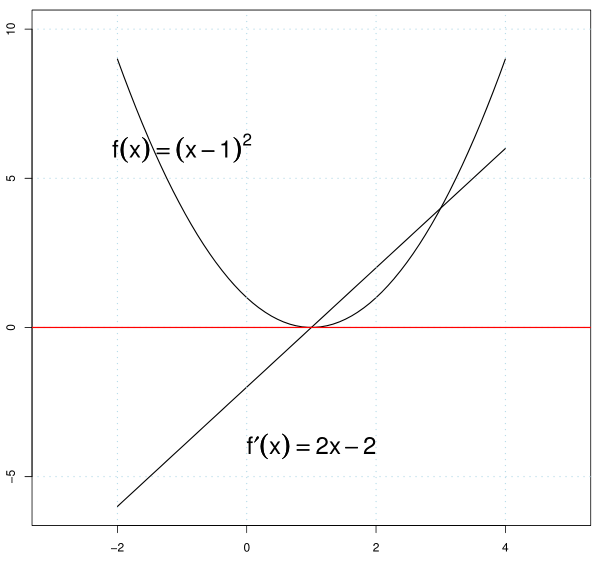

In [5]:
Image('../images/first_derivative.png')
# <img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" 
# id="20_newsgroups" src="../images/first_derivative.png" width="320" height="320">

## derivative of the error term $(y - \hat{y})^2$:
* we expand $\hat{y} = a + b\cdot x$:
$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$
* we take the derivative with respect to $a$ and set the result equal to zero:
$$\frac{\delta \sum_i^{n}(y_i - \hat{y_i})^2}{\delta a} = -2\sum_i^{n}y_i + 2b\sum_i^{n}x_i + 2na = 0$$
* we solve for $a$ and get:
$$a = \bar{y} - b\bar{x}$$
* for $b$ we get in the same way and by substituting $a$ with the above result:
$$ b = \frac{\frac{1}{n}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n}\sum_i^n (x_i - \bar{x})^2} = \frac{\text{cov}_{xy}}{\text{var}_x}$$

In [6]:
# we can easily verify these results
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

cov_xy =(1/X.shape[0]) * np.dot((X - np.mean(X)).T,y - np.mean(y))[0][0]
var_x = (1/X.shape[0]) * np.dot((X - np.mean(X)).T,X - np.mean(X))[0][0]
b = cov_xy/var_x
a = np.mean(y)-b*np.mean(X)
print(f'\nour empirical b parameter is: {b}')
print(f'our empircial a parameter is: {a}')

the parameter b is the coefficient of the linear model [[8.07912445]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [-8.49032154]

our empirical b parameter is: 8.079124453577005
our empircial a parameter is: -8.490321540681798


## multivariate case: more than one x variable
\begin{align*}
    y_1&=a+b_1\cdot x_{11}+b_2\cdot x_{21}+\cdots + b_p\cdot x_{p1}\\
    y_2&=a+b_1\cdot x_{12}+b_2\cdot x_{22}+\cdots + b_p\cdot x_{p2}\\
    \ldots& \ldots\\
    y_i&=a+b_1\cdot x_{1i}+b_2\cdot x_{2i}+\cdots + b_p\cdot x_{pi}\\
  \end{align*}

\begin{equation*}
    \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    = a+
    \begin{bmatrix}
      x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}\\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
 b_1\\
      b_2\\
      .\\
      .\\
      .\\
      b_p
    \end{bmatrix}
\end{equation*}

Next, we can include the constant term $a$ into the vector $b$. This is done by adding an all-ones column to $\mathbf{X}$: 
    
\begin{equation*}
     \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    =
    \begin{bmatrix}
      1& x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      1 &  x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      1& x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
      a\\
      b_1\\
      b_2\\
      .\\
      .\\
      b_p
    \end{bmatrix}
  \end{equation*}
  
In matrix notation this is written:
$$\mathbf{y} = \mathbf{X}\mathbf{b}$$

## derivation of $\mathbf{b}$ for the matrix notation
We apply the same steps as for the derivation above:
* we expand the error term:

  \begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &(\mathbf{y}'-\mathbf{b}'\mathbf{X}')(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &\mathbf{y}'\mathbf{y}-\mathbf{b}'\mathbf{X}'\mathbf{y}-\mathbf{y}'
    \mathbf{X}\mathbf{b}+\mathbf{b}'\mathbf{X}'\mathbf{X}\mathbf{b}=\\
    &\mathbf{y}'\mathbf{y}-2\mathbf{b}'\mathbf{X}'\mathbf{y}+\mathbf{b}'\mathbf{X}'
    \mathbf{X}\mathbf{b}\\
  \end{align*}
 
* derivative of the error term with respect to $\mathbf{b}$
* we set the result equal to zero and solve for $\mathbf{b}$

  \begin{align*}
    \frac{\delta}{\delta
      \mathbf{b}}=&-2\mathbf{X}'\mathbf{y}+2\mathbf{X}'\mathbf{X}\mathbf{b}=0\\
    2\mathbf{X}'\mathbf{X}\mathbf{b}=&2\mathbf{X}'\mathbf{y}\\
    \mathbf{b}=&(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}\quad
  \end{align*}
For the last step, we need the inverse of a matrix: $(\mathbf{X}'\mathbf{X})^{-1}$

## Polynomial regression as an example for more than one variable
In order to easily demonstrate multiple linear regression, we can derive a new variable out of the variable x. For example we could take log(x) or -- as done here -- take the square of it $x^2$ (the quadratic term):<br> $y = a + b_1 x + b_2 x^2$

Some important points are:
* we now have two variables, i.e. we can apply our formula for matrix notation
* more variables will probably lead to a better fit
* the resulting regression line is not a straight line. __The term "linear" in linear regression signifies that the equation is linear in its parameters a, $\textbf{b}_\textbf{1}$, $\textbf{b}_\textbf{2}$. It does not mean that the regression line has to be a straight linear line!!__


In [7]:
from numpy.linalg import inv
# polynomial
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2]

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2]

model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

(-5.0, 110.77315979942053)

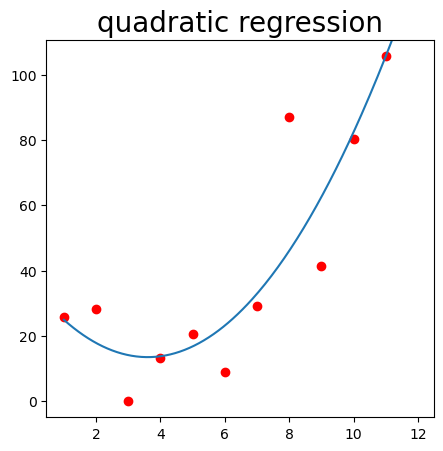

In [8]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='quadratic regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])

In [9]:
# again we can compare the parameters of the model with those resulting from 
# our derived equation:
# b=(X'X)^{-1} X'y
from numpy.linalg import inv

# first we have to add the intercept into our X-Variable; we rename it X_intercept
X_intercept = np.c_[np.ones(X.shape[0]), X]
coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

print(f'our coefs already include the intercept: {coefs}')

the parameter b is the coefficient of the linear model [[-12.14930516   1.68570247]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [35.33794262]
our coefs already include the intercept: [[ 35.33794262]
 [-12.14930516]
 [  1.68570247]]


### Overfitting
We continue with adding variables and exagerate a little bit

The important points to note here:
* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in beneath the empirical y-values are likely to be grossly wrong: this is an example of __overfitting__

In [10]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

(-10.0, 115.77315979942053)

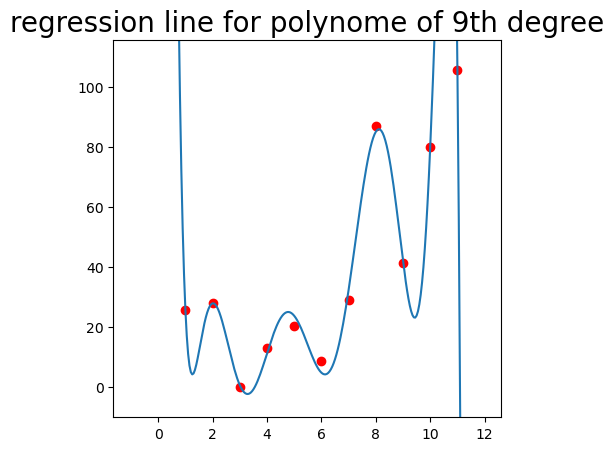

In [11]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 9th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +10])

### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
__Note__ that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.

In [12]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

In [13]:
print(f'the intercept and the coefficients are: {model.intercept_}, {model.coef_}')

the intercept and the coefficients are: [-3441.3761578], [[ 9.78847039e+03 -1.13028575e+04  7.22272630e+03 -2.87529040e+03
   7.50863939e+02 -1.30675765e+02  1.49834150e+01 -1.08409478e+00
   4.47395935e-02 -8.00879370e-04]]


(-10.0, 125.77315979942053)

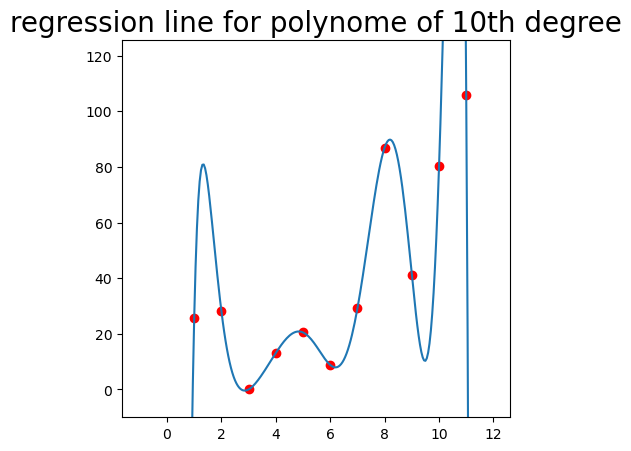

In [14]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 10th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

## What happens if we have more variables than data points?
The short answer: a unique solution is not possible because there are infinitifely many possible ways to adjust $p$ parameters to accommodate $n$ observations when $p > n$.

The long answer: inversion of the matrix $\mathbf{X}'\mathbf{X}$ is not possible.

However, there are decompositions for matrix inversions that allow to invert singular matrices. Numpy is using such a decomposition, called LU-decomposition.

One way to see in python that the solution is erroneous is to use the scipy.linalg.solve package and solve for the matix S that solves $(\mathbf{X}'\mathbf{X})^{-1} \mathbf{S} = \mathbf{I}$.<br> $\mathbf{I}$ is called the eye-matrix with 1s in the diagonale and zeros otherwise:
$$
\mathbf{I}=\left[
\begin{array}{ccc}
   1 & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & 1
\end{array}
\right]
$$


In [15]:
warnings.filterwarnings("default")
from numpy.linalg import inv
from scipy.linalg import solve
model = LinearRegression()
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13]

# this should give at least a warning, because matrix inversion as done above is not possible
# any more, due to singular covariance matrix [X'X]
model.fit(X, y)
#y_hat = np.dot(x , model.coef_.T)  + model.intercept_
XX = solve(inv(np.dot(X.T, X)), np.eye(13))

/home/martin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: LinAlgWarning: Ill-conditioned matrix (rcond=3.8573e-21): result may not be accurate.
  from ipykernel import kernelapp as app


# statistical package R
The R statistical package is behaving still in another way. No warning is issued but coefficients are only computed for 11 variables (intercept included).

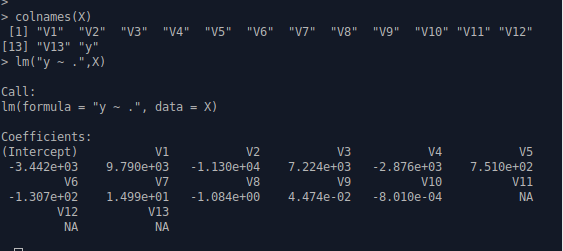

In [16]:
Image("../images/R_inverse_example.png")
# <img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" id="20_newsgroups" src="../images/R_inverse_example.png" width="640" height="640">

# Dealing with overfitting
As we could see, if there are many variables and only few observations, classical linear regression tends to overfit heavily.<br>
One solution for this problem is to shrink the coefficients $b_1, b_2, b_3, \ldots$. This can be achieved by making the error bigger with bigger coefficients. The algorithm strives to reduce the error and hence has to shrink the coefficients to lower values.

## Ridge regression

Remember this formula:
$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$

To make the error term bigger, we could simply add $\lambda\cdot b^2$ to the error:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b^2= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda b^2$$

The parameter $\lambda$ is for scaling the amount of shrinkage.

For two variables we can write:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b_1^2 + \lambda b_2^2= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda b_1^2 + \lambda b_2^2$$

And in matrix notation for an arbitrary number of variables:
\begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2 + \lambda \mathbf{b}^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b}) + \lambda \mathbf{b}'\mathbf{b}
  \end{align*}

Interestingly, this error term has a closed form solution, i.e. there is a analytical solution and we do not have to resort to iterative algorithms. However, remember that we included the intercept parameter $a$ in $\mathbf{b}$ and added an extra column with ones to the matrix $\mathbf{X}$. By computing $\lambda \mathbf{b}'\mathbf{b}$ we would also shrink the intercept parameter - what is not meaningfull since its effect is to account for the means of the variables: $a=\bar{y} - b\bar{x}$<br>
In order to remove this term, we have to center the variables. When $\bar{y}=0$ and $\bar{x}=0$ then $a$ vanishes.<br>
The solution for $\mathbf{b}$ is then given as:
$$\hat{\mathbf{b}} = (\mathbf{X}'\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}'\mathbf{y}$$

Following Hastie et al., originally, this was introduced to cope the rank deficency problems. When the algorithm was first proposed, it was not possible to invert a square matrix not of full rank. Hence, adding a small positive amount to its diagonal solved this problem. This can be demonstrated with our numerical example:

In [17]:
warnings.filterwarnings("ignore")
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

In [18]:
X_6 = np.c_[X, X**2, X**3, X**4, X**5, X**6]
print(f'With 6 variables (polynom of 6th degree), the rank of the quare matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_6.T, X_6))}')

X_7 = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
print(f'With 7 variables (polynom of 7th degree), the rank of the quare matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7))}')

print(f'By adding a small amount to the diagonal of the matrix, it is of full rank\n again: '\
     + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7) + np.eye(7) * 2)}')
## you can see how small this amount is, by having a glimpse on the diagonal elements:
print('\nto see how small the added amount in reality is, we display the diagonal elements:')
np.diag(np.dot(X_7.T, X_7))

With 6 variables (polynom of 6th degree), the rank of the quare matrix
 is 6
With 7 variables (polynom of 7th degree), the rank of the quare matrix
 is 6
By adding a small amount to the diagonal of the matrix, it is of full rank
 again: 7

to see how small the added amount in reality is, we display the diagonal elements:


array([            506,           39974,         3749966,       382090214,
           40851766526,   4505856912854, 507787636536686])

### example of ridge regression
Next, we will apply ridge regression as implemented in the python sklearn library and compare the results to the analytical solution. Note, that we have to center the variables.
* we can center $\mathbf{X}$ and $\mathbf{y}$ and display the result in the centered coordinate system
* or we can center $\mathbf{X}$ and add the mean of $\mathbf{y}$ to the predicted values to display the result in the original coordinate system. This approaches allows for an easy comparison to the overfitted result

In [19]:
from sklearn.linear_model import Ridge
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Ridge(alpha=2, fit_intercept=False)
model.fit(Xc, y)
print(f'the parameters from the sklearn library:\n'\
     + f'{model.coef_}')

# the analytical result as discussed above
inverse = np.linalg.inv(np.dot(np.transpose(Xc), Xc) + np.eye(Xc.shape[1]) * 2)
Xy = np.dot(np.transpose(Xc),y)
params = np.dot(inverse, Xy)
print(f'the parameters as obtained from the analytical solution:\n'
     + f'{np.transpose(params)}')
params_ridge = params

the parameters from the sklearn library:
[[-1.96523108e-01 -6.47914003e-01 -9.37247119e-01  1.55320112e-01
   3.20681202e-02 -6.80277139e-03  3.08899915e-04]]
the parameters as obtained from the analytical solution:
[[-1.96523119e-01 -6.47914004e-01 -9.37247118e-01  1.55320112e-01
   3.20681203e-02 -6.80277139e-03  3.08899915e-04]]


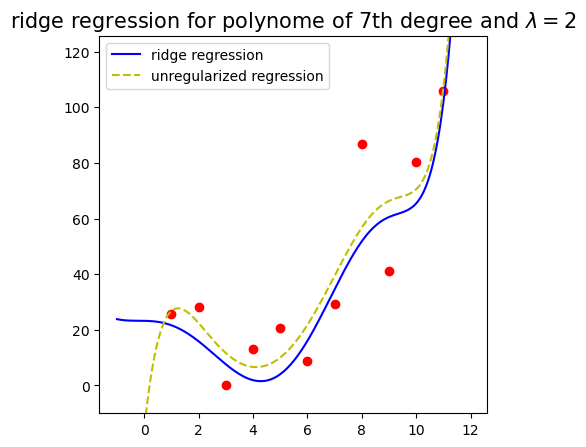

In [20]:
# here we add the mean of y to the predictions to display results in original coord. system
y_hat = np.dot(xc , params)  + np.mean(y)

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='ridge regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='ridge regression')          
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()

## Lasso

To make the error term bigger, alternatively, we could add the absolute value $\lambda\cdot |b|$ to the error:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b^2= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda |b|$$

For two variables we can write:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b_1| + \lambda |b_2|= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda |b_1| + \lambda |b_2|$$
  
Unfortunately, and contrarily to ridge regression, there exists no closed form expression for computing the coefficients for the lasso.

### lasso regression
Next, we will apply lasso regression as implemented in the python sklearn library and compare the results to the unconstraint regression results.<br>
As before, we have to center the variables (-> see discussion above)

In [21]:
import numpy as np
from sklearn.linear_model import Lasso
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Lasso(alpha=2, fit_intercept=False)
model.fit(Xc, y)
params_lasso = model.coef_

# comparison of parameters ridge vs. lasso:
print(f'the parameters of the ridge regression:\n'\
     + f'{np.transpose(params_ridge)}')

print(f'the parameters of the lasso regression:\n'\
     + f'{params_lasso}')

the parameters of the ridge regression:
[[-1.96523119e-01 -6.47914004e-01 -9.37247118e-01  1.55320112e-01
   3.20681203e-02 -6.80277139e-03  3.08899915e-04]]
the parameters of the lasso regression:
[-0.00000000e+00 -1.27169261e+00  2.49755651e-01  7.47152651e-04
 -5.77539403e-04 -2.73002774e-05  1.76588437e-06]


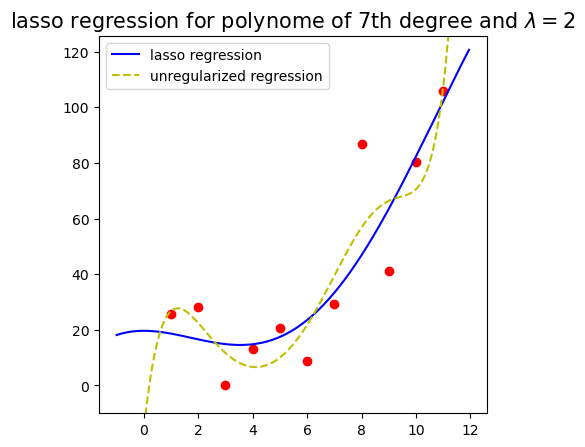

In [22]:
y_hat = np.dot(xc, model.coef_.reshape((-1,1))) + np.mean(y)
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')          
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()



## the difference between ridge and lasso
Ridge regression tends to shrink all parameters in an equal manner. Lasso often leads to solutions with some parameters converged to zero. Hence lasso can also be a variable selection algorithm. Compare the results for our little toy example. Essentially, lasso has only two parameters (for $X^2$ and $X^3$) that are different from zero. All other parameters' absolute values are smaller than $0.0007$.
To see why lasso shrinks parameters to zero, we will:
* generate a random dataset $y = 1.5 \cdot x_1 + 0.5 \cdot x_2$
* compute mean squared error (MSE) for a grid of different values for $b_1$ and $b_2$
* plot error contour
* show the geometric shape of the penalties: $\lambda \sum_j b_j^2$ and $\lambda \sum_j |b_j|$
* indicate the optimal point for the combination of penalty and MSE-error

the model parameters from data generation could be recovered: [1.5 0.5]


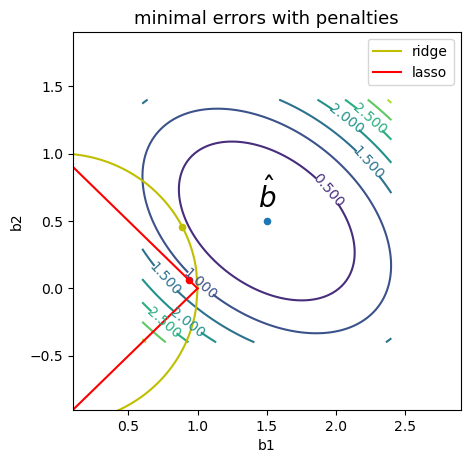

optimal coefficients of the ridge solution: 0.888888888888889 and 0.4581228472908511
optimal coefficients of the lasso solution: 0.9393939393939394 and 0.06060606060606055


In [23]:
# generation of random data set:
X1 = np.random.normal(loc = 1.0, scale = 0.8, size = 100)
X2 = np.random.normal(loc = 0.5, scale = 1.2, size = 100)
beta1 = 1.5
beta2 = 0.5
Y = beta1 * X1 + beta2 * X2
X = np.c_[X1, X2]

# test with linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model.intercept_ # essentiall zero
model.coef_ # essentially 0.2 and 0.5
print(f'the model parameters from data generation could be recovered: {model.coef_}')

# make regular grid of values for b_1 and b_2
b1 = np.linspace(beta1 - 0.9, beta1 + 0.9, 100)
b2 = np.linspace(beta2 - 0.9, beta2 + 0.9, 100)
bb1, bb2 = np.meshgrid(b1, b2)

# compute MSE-error
Yhat = bb1.reshape(-1, 1) * X1.reshape(1, -1) + bb2.reshape(-1, 1) * X2.reshape(1, -1)
errors = np.square(Yhat - Y.reshape(1, -1))
error = np.sum(errors, axis = 1)/len(Y)
error_to_plot = error.reshape(bb1.shape)

# plot MSE-error contour
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='minimal errors with penalties', fontdict={'fontsize':13})
axes = f.add_subplot(111)
cp = plt.contour(bb1, bb2, error_to_plot)
plt.clabel(cp, inline=1, fontsize=10)
axes.set_xlabel('b1') 
axes.set_ylabel('b2')
axes.set_ylim([np.min(b2)-0.5, np.max(b2) + 0.5])
axes.set_xlim([np.min(b1)-0.5, np.max(b1) + 0.5])


# plot optimal solution
axes.scatter(beta1, beta2, s = 20)
axes.annotate('$\hat{b}$', xy=(beta1 , beta2 + 0.1), xycoords='data',
              horizontalalignment = 'center', size = 20)             

# all ridge solutions with a penalty budget of 1
constraint_error = 1.0
values = np.linspace(0, 1.0, 100)
constraint_l2 = np.sqrt(constraint_error - values**2)
axes.plot(values, constraint_l2, 'y-', label = 'ridge')
axes.plot(-values, constraint_l2, 'y-')
axes.plot(values, -constraint_l2, 'y-')

# all lasso solutions with a penalty budget of 1
constraint_l1 = constraint_error -values
axes.plot(values, constraint_l1, 'r-', label = 'lasso')
axes.plot(-values, constraint_l1, 'r-')
axes.plot(values, -constraint_l1, 'r-')

# best ridge solution with penalty budget of 1
Yhat_ridge = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l2, -constraint_l2)).reshape(-1,1) * X2.reshape(1, -1)
errors_ridge = np.square(Yhat_ridge - Y.reshape(1, -1))
error_ridge = np.sum(errors_ridge, axis = 1)/len(Y)
index_ridge = np.where(error_ridge ==np.amin(error_ridge))[0][0]
axes.scatter(np.concatenate((values, values))[index_ridge],
             np.concatenate((constraint_l2, -constraint_l2))[index_ridge],
             s=20, c='y')

# best lasso solution with penalty budget of 1
Yhat_lasso = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l1, -constraint_l1)).reshape(-1,1) * X2.reshape(1, -1)
errors_lasso = np.square(Yhat_lasso - Y.reshape(1, -1))
error_lasso = np.sum(errors_lasso, axis = 1)/len(Y)
index_lasso = np.where(error_lasso ==np.amin(error_lasso))[0][0]
axes.scatter(np.concatenate((values, values))[index_lasso],
             np.concatenate((constraint_l1, -constraint_l1))[index_lasso],
             s=20, c='r')


legs = axes.legend()
plt.show()
print(f'optimal coefficients of the ridge solution: {np.concatenate((values, values))[index_ridge]}'\
      f' and {np.concatenate((constraint_l2, -constraint_l2))[index_ridge]}')

print(f'optimal coefficients of the lasso solution: {np.concatenate((values, values))[index_lasso]}'\
      f' and {np.concatenate((constraint_l1, -constraint_l1))[index_lasso]}')


In the figure above the optimal solution (without regularization) is at (1.5, 0.5) and is indicated by $\hat{b}$. This solution is associated with 0 mean squared error (MSE).<br> 
The contour lines indicate the mse-error corresponding to the respective choice of the parameter values.<br>
The yellow ball like line and the red triangular line indicate parameter values corresponding to a penalty budget of 1 for the ridge and the lasso respectively. The best solution is given by the point on the line associated with the least mse-error. These points are also indicated.<br>
As can be seen, the ridge regression shrinks both parameters whereas the lasso drives the $b_2$ estimate towards zero and the $b_1$ estimate towards one.

# Elastic net
The ridge regression and the lasso tend to shrink parameters quiet differently. A compromise that gaines huge popularity is a combination of the two:
$$ \lambda\sum_j (\alpha b_j^2 + (1-\alpha)|b_j|)$$
Besides $\lambda$ which gears the amount of regularization, a new parameter, $\alpha$ weights the contribution of the $l_2$ penalty originating from ridge regession and the $l_1$ penalty due to lasso regression.<br>
We will use elastic net in our data example.

# Interaction
If the effect of one variable on the outcome depends on the value of another variable. As an example we could try to model the probability that someone is going to buy a house. A very important variable for buying a house will be the monthly income. Another one could be the marital status (single, maried, maried with kids). Maried persons with kids will be very inclined to buy a house if the income situation is favorable. Singles, even with high income will not be considering buying a house. So, the effect of income is different for the levels of marital status:

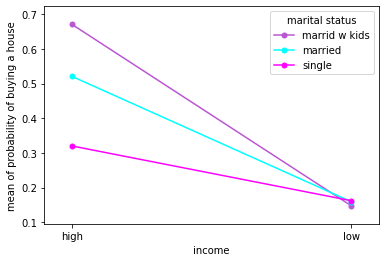

In [24]:
from statsmodels.graphics.factorplots import interaction_plot
import pandas as pd

income = np.random.randint(0, 2, size = 80) # low vs high
marital = np.random.randint(1, 4, size = 80) # single, married, married & kids

probability = np.random.rand(80) + income * np.random.rand(80) * marital
probability = (probability - np.min(probability))
probability = probability/np.max(probability)

marital = pd.Series(marital)
marital.replace(to_replace = {1:'single', 2:'married', 3:'marrid w kids'}, inplace =True)

income = pd.Series(income)
income.replace(to_replace = {0:'low', 1:'high'}, inplace = True)

fig = interaction_plot(income, marital, probability,
                       colors=['mediumorchid', 'cyan', 'fuchsia'], ms=10, xlabel='income',
                       ylabel='probability of buying a house',
                       legendtitle='marital status')


This introducing example comprised categorical variables. Interaction effects may also exist for continuous variables. In this case it is just harder to visualize. Again, we will construct our own data example and build a strong interaction into it. To properly visualize the data, we have to put one variable into bins. However, the scatter plot allows for an intuitive understanding of the interaction of two continuous variables.

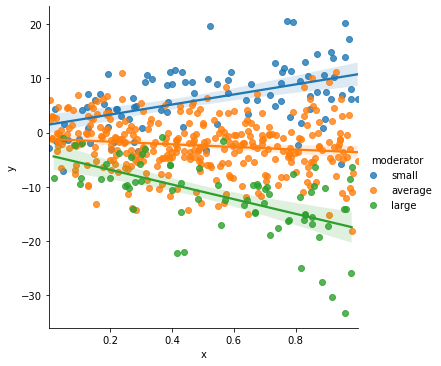

In [25]:
import seaborn as sns
n = 500
x = np.random.uniform(size=n)
m = np.random.normal(loc = 0.5, scale = 1, size = n)

#  lin effects + interaction + random error
y = 2*x + -2*m + -7*(x*m) + np.random.normal(loc = 0, scale = 4, size = n)

newM = pd.cut(m, bins=3, labels = ['small', 'average', 'large'])


toy = pd.DataFrame({'x' : x, 'y' : y, 'moderator' : newM})
sns.lmplot(x="x", y="y", hue="moderator", data=toy);

As can be seen, the interaction effect is build into the example data, by simply multiplying two variables. Lets see, if we can recover the coefficients. We will also see that the model fit is better when the interaction term is included:

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.c_[x, m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'without considering the interaction, the mse is: {np.mean((y-y_hat)**2)}')

X = np.c_[x, m, x * m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'considering the interaction, the mse drops to: {np.mean((y-y_hat)**2)}')
print(f'\nthe coefficients are given by {model.coef_}; compare these values\n to the values '\
     + f'we used for generating the data')

without considering the interaction, the mse is: 20.118416035528497
considering the interaction, the mse drops to: 15.618612041650909

the coefficients are given by [ 2.42109021 -1.9539956  -7.29813913]; compare these values
 to the values we used for generating the data


### some considerations
Let's assume, we have a data set with 70 different variables. Since we do not know anything about the relationsship of the variables to the dependent variable (y), nor of the variables among each other, we are inclined to construct a lot of new variables:
* we can add all 70 quadratic terms ($x_j^2$)
* we can add all 70 cubic terms ($x_j^3$)
* we could add all $\binom{70}{2} = 2415$ first-order interactions among the 70 variables
* instead, we could add all first-order interactions among the 210 variables including the quadratic and the cubic terms: $\binom{210}{2} = 21945$
* besides quadratic and cubic transformations, there my be other transformations leading to better results, like the log-transform.

As you can see, the number of possible variables can grow very fast, when considering all possible effects that might be present in the data. Sometimes, there exists second-order interaction effects, that were not mentioned in the considerations above.<br>
All these variables would likely lead to severe overfitting if we would naively include them in our linear regression model. __That's why we introduced regularization techniques like the elastic net and its components, the ridge and the lasso__.

# How confident are we about our predictions
Essentially, there are two questions that one could ask after fitting a linear model:
* How confident are we about the estimated parameters $\mathbf{b}$? This is most often asked by statisticians because for them, the interpretation of the coefficients is of paramount interest.
* How confident are we about the predictions? This is asked in machine learning because we want to apply the model to unseen data and use the predictions in our business process.
    Here, we have to deal with two different questions:
    * How much will the mean response, our prediction - the regression line - vary?
    * How much variation is in the observations $y$ given the level of $X$?

## Recap of assumptions underlying regression
* __Linearity__: The regression line is a good fit for the relation between $\mathbf{X}$ and $\mathbf{y}$, i.e., if there is a quadratic trend in the data and we fit a model without quadratic term, the assumptions are not met (--> __bias__).
* __Homoscedasticity__: The variance of the residuals is identical for all values of $\mathbf{X}$.
* __Normality__: The  values of $\mathbf{y}$ given a certain $\mathbf{x}$, i.e. of $\mathbf{y}|\mathbf{x}$ are normaly distributed.<br>

Image taken from [here](https://janhove.github.io/analysis/2019/04/11/assumptions-relevance)

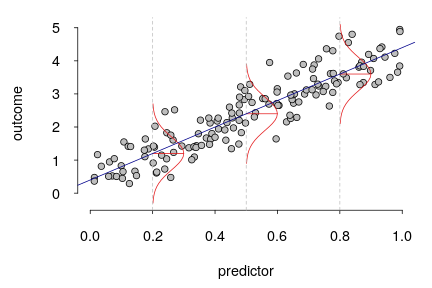

In [27]:
Image('../images/homoscedasticity.png')

Now, with respect to our confidence need:
1. __Prediction interval__: The interval around our prediction, 95% (97.5%) of all observed values are supposed to fall in; This interval is symmetrical around the regression line. This fact follows from the assumptions discussed above. The standard error of prediction (or forecast) is given by: $$\hat{\sigma}_e = \sqrt{\frac{1}{N-(p+1)}\sum_i^N e_i^2},$$
with $p$ being the number of parameters (the term $+1$ is for the intercept); $e_i$ are the residuals, i.e., the differences between the observed data points $y_i$ and the prediction $\hat{y}_i$. The confidence interval is given by:
$$ CI_i = y_i \pm t_{1-\alpha/2, N-p} \cdot \hat{\sigma}_e.$$
Here, $t_{1-\alpha/2, N-p}$ is the value of the student-t-distribution for a confidence level of $1-\alpha/2$ and $N-p$ degrees of freedom.

2. __Confidence interval__: In a similar manner (a bit more involved) we could derive the confidence interval for the predicted mean $\hat{y}_i$. Remember, that data is supposed to be normally distributed. The regression line we fit, is an estimate of the mean for a given configuration $\mathbf{x}_i$. Of course, we do not fit the empirical values exactly; some may be lying above the regression line, some beneath. This confidence interval gives an upper and a lower bound for the mean estimate, i.e. the regression line. This confidence interval is not equidistant from the regression line for all values of $\mathbf{x}$. In the regions where data is sparse, the regression line can not be estimated with high confidence. In contrast, near the mean of $\mathbf{x}$ the estimate is supposed to be more accurate (normaly distributed $\mathbf{x}$ assumed).

3. __CI for regression coefficients__: Again, the derivation of the formulae for this CI is more involved than this for the prediction interval. This interval gives the upper and lower boundary for the coefficients $\mathbf{b}$. These coefficients indicate how important the respectiv variable is in the regression equation. The interpretation of these coefficients is linked to `real` science, where the epistemological caveat is the matter of interest. For example: "is closing schools and universities related to lower base reproduction numbers ($R_0$)". This is typically not the kind of questions a data scientist is trying to answer ;-)

In the following code examples, first, we display the classical summary statistics. In the middle of the printed output, you can find the confidence intervals for the regression coefficients 'const' (intercept) and $x_1$, the $b_1$ coefficient. The plots illustrate te he points 1 and 2.<br>

If someone has a strong interest in these more statistical models, I can recommend this [source](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-7-UnivarPredict.html).

In [28]:
import statsmodels.api as sm

# data example
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept = np.c_[np.ones(x.shape[0]), x]


X_intercept = np.c_[np.ones(X.shape[0]), X]

ols_result_lin = sm.OLS(y, X_intercept).fit()
y_hat_lin = ols_result_lin.get_prediction(x_intercept)



dt_lin = y_hat_lin.summary_frame()
mean_lin = dt_lin['mean']
meanCIs_lin = dt_lin[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_lin = dt_lin[['obs_ci_lower', 'obs_ci_upper']]

In [29]:
print(ols_result_lin.summary()) # beta-coefficients

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     12.64
Date:                Thu, 03 Jun 2021   Prob (F-statistic):            0.00616
Time:                        10:10:18   Log-Likelihood:                -49.385
No. Observations:                  11   AIC:                             102.8
Df Residuals:                       9   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4903     15.410     -0.551      0.5

(-10.0, 115.77315979942053)

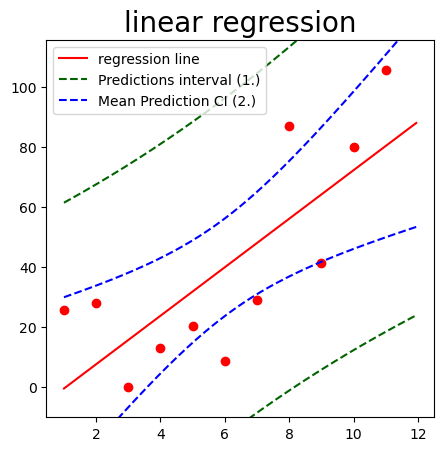

In [30]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='linear regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X_intercept[:,1], y, 'ro')
axes.plot(x_intercept[:, 1], mean_lin.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

The same plot is derived for an equation including a quadratic term:

In [31]:
X_intercept_quad = np.c_[X_intercept, X**2]

# for plotting:
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept_quad = np.c_[np.ones(x.shape[0]), x, x**2]

ols_result_quad = sm.OLS(y, X_intercept_quad).fit()


y_hat_quad = ols_result_quad.get_prediction(x_intercept_quad)
dt_quad = y_hat_quad.summary_frame()
mean_quad = dt_quad['mean']
meanCIs_quad = dt_quad[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_quad = dt_quad[['obs_ci_lower', 'obs_ci_upper']]

In [32]:
print(ols_result_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     14.39
Date:                Thu, 03 Jun 2021   Prob (F-statistic):            0.00224
Time:                        10:10:18   Log-Likelihood:                -45.820
No. Observations:                  11   AIC:                             97.64
Df Residuals:                       8   BIC:                             98.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3379     20.074      1.760      0.1

(-10.0, 115.77315979942053)

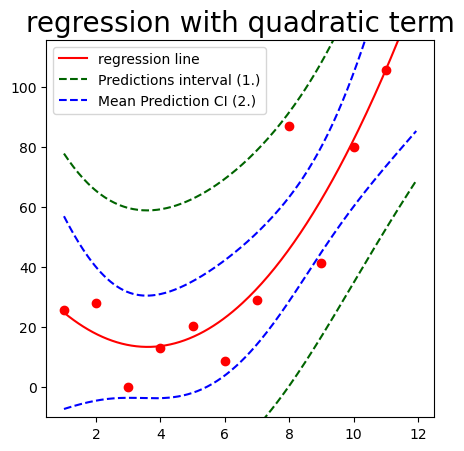

In [33]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression with quadratic term', fontdict={'fontsize':20})
axes = f.add_subplot(111)

axes.plot(X_intercept_quad[:,1], y, 'ro')
axes.plot(x_intercept_quad[:, 1], mean_quad.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept_quad[:, 1], meanCIs_quad.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_quad.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

## Bootstrap
With real, messy data it is rather seldom to meet all the assumptions underlying the theory of confidence intervals. A robust alternative, without any assumptions is the bootstrap. We view our data sample as the population and draw samples from it, with replacement. We fit the model to each of these samples and gather the statistics of relevance. Then we report the 2.5% quantile and the 97.5% quantile as the boundaries of our confidence interval with confidence level of $\alpha=5\%$.

In [34]:
from random import choices
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')


#X = np.c_[np.ones(X.shape[0]), X, X**2, X**3, X**4]
X = np.c_[X, X**2, X**3, X**4]
x = np.arange(1, 12, 0.05).reshape((-1, 1))
#x = np.c_[np.ones(x.shape[0]), x, x**2, x**3, x**4]
x = np.c_[x, x**2, x**3, x**4]
indices = np.arange(0, X.shape[0])

drew = choices(indices, k=len(indices))

sampler = (choices(indices, k = len(indices)) for i in range(200))

CIS = np.percentile(np.array([Lasso(alpha=2, fit_intercept=True).fit(X[drew,:], y[drew, :])\
                              .predict(x).tolist()
                              for drew in sampler]), [2.5, 97.5], axis = 0)
# x is 220 long
model = Lasso(alpha=2, fit_intercept=True)
model.fit(X, y)
y_hat = model.predict(x)

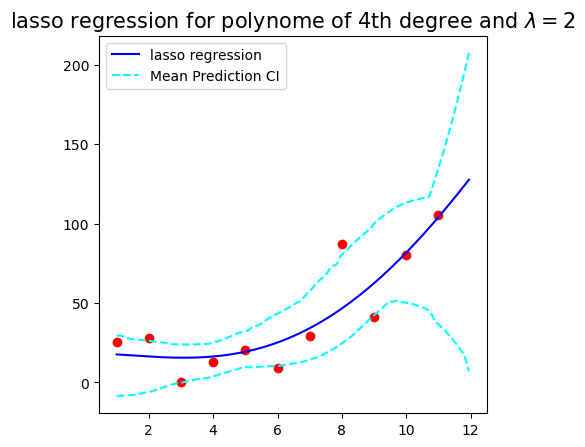

In [35]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 4th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')

axes.plot(x[:, 0], CIS[0, :], color = "cyan", linestyle = "--", 
         label = "Mean Prediction CI")
axes.plot(x[:, 0], CIS[1, :], color = "cyan", linestyle = "--")
axes.legend()

# Extension: logistic regression and the GLM
There are other models that are relatives of the linear model that we discussed in this notebook. One of the most prominent is the __logistic regression__. This model belongs to the "__generalized__ linear model" (GLM). The GLM may not be confounded with the "__general__ linear model". The latter essentially expresses analysis of variance (ANOVA) in terms of linear regression.<br>
The __GLM__ extends the
linear regression beyond models with normal error distributions. This
remark in the corresponding wiki-article is enlightening:
[read wikipedia for this](https://en.wikipedia.org/wiki/Generalized_linear_model#Confusion_with_general_linear_models)

## exponential family of distributions
From the perspective of modern statistics the GLM comprises many
different linear models, among others the classical linear model. Every
distribution in the exponential family can be written in the following
form:
$$f(y| \theta) = \exp\left(\frac{y \theta + b(\theta)}{\Phi} + c(y, \Phi)\right),$$
where $\theta$ is called the canonical parameter that in turn is a
function of $\mu$, the mean. This function is called the canonical link
function that links $\mu$ to a linear function of the regression
parameters. In short: it is this function that linearizes the relation
between the dependent and the independent variables. For the sake of
completeness: $b(\theta)$ is a function of the canonical parameter and
hence, also depends on $\mu$. $\Phi$ is called the dispersion parameter
and $c(y, \Phi)$ is a function depending on the observation and the
dispersion parameter.

### Normal distribution

\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}\frac{y^2 -2y\mu + \mu^2}{\sigma^2}\right) \\
 =&\quad \exp \left(\frac{y\mu -\frac{\mu^2}{2}}{\sigma^2} - \frac{1}{2}\left(\frac{y^2}{\sigma^2} + \log(2\pi\sigma^2\right)\right),\quad \text{with}
\end{eqnarray*}

$\mu = \theta(\mu)$, i.e. $\mu$ is the canonical parameter and the link
function is given by the identity function. Hence, the mean can be
modeled directly without any transformation. The dispersion parameter $\Phi$ is given by $\sigma^2$, the variance. This case is the classical
linear regression.

### Poisson distribution
Now, for the Poisson distribution we have

\begin{eqnarray*}
f(y| \mu) =& \frac{\mu^{y} e^{-\mu}}{y!} = \mu^y e^{-\mu}\frac{1}{y!}\\
=& \quad\exp\left(y \log(\mu) - \mu - \log(y!)\right), \quad\text{where}
\end{eqnarray*}

the link function is given by $\log(\mu)$. Note that the Poisson
distribution does not have any dispersion parameter.

### Bernoulli distribution $\Rightarrow$ logistic regression
And finally the Bernoulli distribution from which we derive the logistic
regression. Using the Bernoulli distribution, we can calculate the probabilities of experiments consisting of binary events. The classical example is coin flipping. Here, $\pi$ is the probability of the coin showing 'head'; $(1-\pi)$ is the probability of the coin showing 'tail'. We can now calculate the probability of getting exactly 7 times head for 10 tosses with a fair coin:
$$\pi^7 (1-\pi)^3 = 0.5^7 0.5^3 = 0.5^{10} = 0.0009765625$$

Next, I demonstrate how we can rewrite the Bernoulli distribution to fit into the framework of the exponential family:
\begin{eqnarray*}
f(y |\pi) =& \pi^y (1-\pi)^{1-y} = \exp\left(y \log(\pi) + (1-y) \log(1-\pi)\right)\\
= & \quad \exp\left(y \log(\pi) + \log(1-\pi) - y\log(1-\pi)\right)\\
=&\quad \exp\left(y\log(\frac{\pi}{1-\pi}) + \log(1-\pi)\right),\quad\text{where}
\end{eqnarray*}

the link function evaluates to $\log(\frac{\pi}{1-\pi})$. This function
is also called the logit function whose reverse function is the logistic
function. Hence, it is the logit that is modeled by a lineare function
of the regressors:
$\log(\frac{\pi}{1-\pi}) = a + b_{1}x_1 + \ldots + b_jx_j$. If we plug
the right hand term into the logistic function we get the estimated
probabilities:
$$P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}.$$

Here, I showed that the classical linear regression with normal
error terms can be seen as a special case of a much wider family of
models comprising all distributions out of the exponential family. (For
a more complete treatment of other distributions see again
https://en.wikipedia.org/wiki/Generalized\_linear\_model.)

# GLMNET
In the statistical language R, there exists a library called 'glmnet'. This package implements the elastic net as we discussed here but for the glm and not only for the classical linear regession.<br>
https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

There exists also a python package implementing glmnet by using the exact same fortran code: __glmnet-python__.<br>
There are some subtleties in the implementation that are different from the elastic net version as provided by sklearn.
https://pypi.org/project/glmnet-python/

# Neural Network
We can also cast linear regression into a neural network context. The network has no hidden layer. The activation function in the output neuron is either the identity function $y=x$ for classical linear regression or the logistic function for logistic regression.

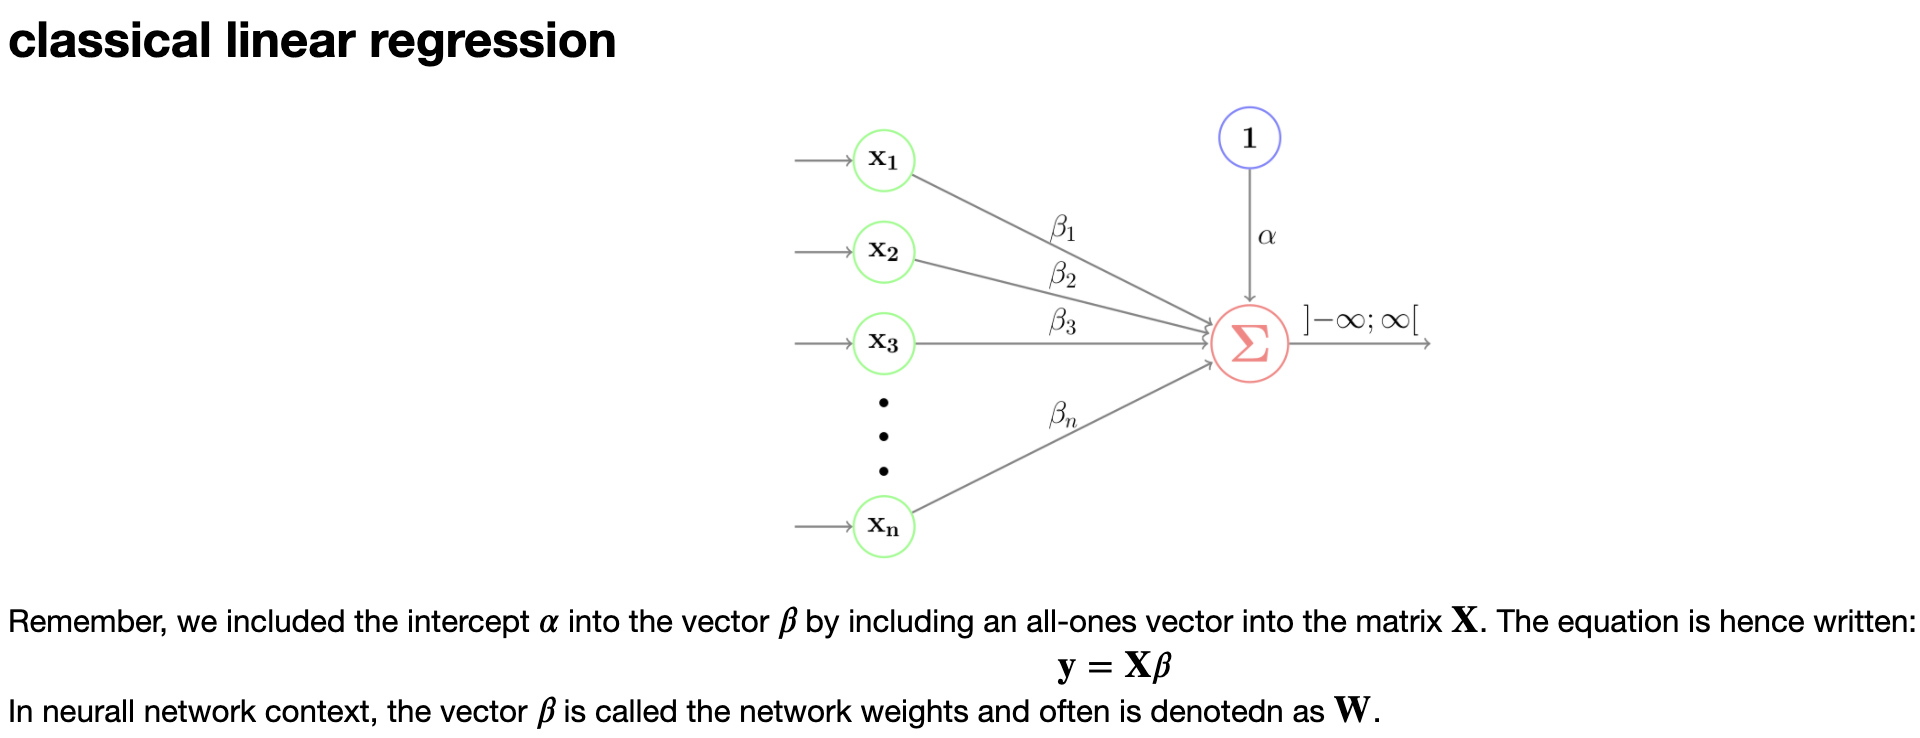

In [36]:
Image('../images/Regression_as_NN.png')

## classical linear regression

<img alt="" caption="classical linear regression viewed as a neural network with no hidden layer" id="NN_class_reg" width=300 height=300 src="../images/NN_class_reg.png">

Remember, we included the intercept $\alpha$ into the vector $\mathbf{\beta}$ by including an all-ones vector into the matrix $\mathbf{X}$. The equation is hence written: 
$$\mathbf{y} = \mathbf{X} \mathbf{\beta}$$
In neurall network context, the vector $\mathbf{\beta}$ is called the network weights and often is denotedn as $\mathbf{W}$.

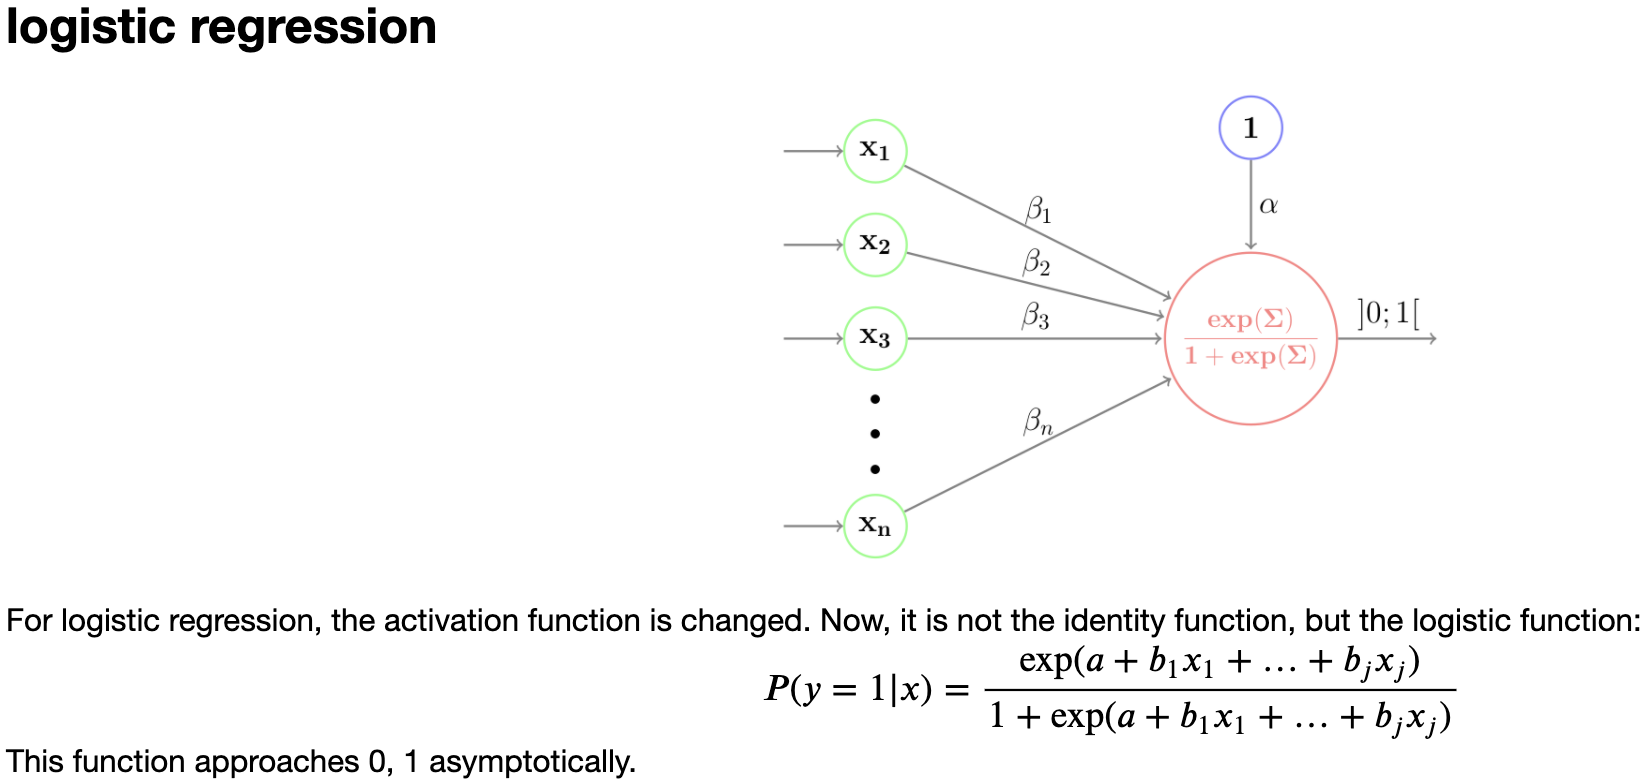

In [37]:
Image('../images/LogisticRegression_as_NN.png')

## logistic regression

<img alt="" caption="classical linear regression viewed as a neural network with no hidden layer" id="NN_logistic_reg" width=300 height=300 src="../images/NN_logistic_reg.png">

For logistic regression, the activation function is changed. Now, it is not the identity function, but the logistic function:
$$P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}$$
This function approaches 0, 1 asymptotically.

### Weight decay
In the neural network literature, the $l_2$-penalty term is called "weight decay". It is not a parameter of the single layers or neurons, but of the optimizer. As with regularized regression, the weight decay is written:
$$L' = L + \lambda\sum_i w_i^2, $$
where $L$ is the actual loss and $w_i$ are the weights of the incoming connections of a neuron.